### Model: Support Vector Machine (SVM) with RBF Kernel


## Description
- Radial Basis Function Support Vector Machine is an ML algorithm that can be used for classification and regression tasks. It can work well with non-linear data.
- It works by mapping the input data into a high-dimensional feature space and the Radial Basis kernel function measures the similarity between pairs of data points within the space.
    - Radial Basis Function: K(x, x’) = exp(-gamma ||x — x’||²)
        - x and x' are input data points. Gamma controls the width of the kernel and we are taking the euclidean distance between the data points. 
        - The function will be measuring the similarity between the points based on the euclidean distance

- We can calculate the gamma parameter's validation curve to visualize how the performance of the model varies as a function of a hyperparameter while training the model.
- Cross validation: used to estimate the performance of an ML model on an independent dataset. We will split the data across different subsets and obtain an estimate of the model's performance on unseen data. This helps prevent overfitting
    
- https://medium.com/@eskandar.sahel/introduction-to-rbf-svm-a-powerful-machine-learning-algorithm-for-non-linear-data-1d1cfb55a1a


### Scaling Data
- Volume: millions
- Sentiment_Compound: between -1 and 1
- Open and Close: hundreds

RBF SVM uses distances in feature spaces and large scale features tend to dominate and small scale features become invisible


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [107]:
def apply_lag_features(merged_df):
    # add previous one-day values
    merged_df["prev1_open"] = merged_df["Open"].shift(1)
    merged_df["prev1_close"] = merged_df["Close"].shift(1)

    # add previous two-day values
    merged_df["prev2_open"] = merged_df["Open"].shift(2)
    merged_df["prev2_close"] = merged_df["Close"].shift(2)

    # previous 1 day sentiment
    merged_df["prev1_sentiment_compound"] = merged_df["sentiment_compound"].shift(1)

    # previous 2 day sentiment
    merged_df["prev2_sentiment_compound"] = merged_df["sentiment_compound"].shift(2)

    # previous 1 day volume
    merged_df["prev1_volume"] = merged_df["Volume"].shift(1)

    # previous 2 day volume
    merged_df["prev2_volume"] = merged_df["Volume"].shift(2)

    
    return merged_df

In [108]:
def drop_na(merged_df):
    merged_df = merged_df.dropna()
    merged_df.reset_index(drop=True, inplace=True)
    return merged_df

In [121]:
def svm_model(df):
    features = [
        'Open', 'Close', 'Volume', 'sentiment_compound', 'prev1_open', 'prev1_close','prev1_volume',
        'prev2_volume', 'prev2_open', 'prev2_close', 'prev1_sentiment_compound',
        'prev2_sentiment_compound'
    ]

    X = df[features]
    y = df['target'].astype(float)  # goal is to predict the next day's closing price (classification)

    valid_idx = np.isin(y, [-1, 1]) # removing any row that does not have -1 or 1 as target
    X = X[valid_idx]
    y = y[valid_idx]

    # scale features in order to avoid certain features from dominating others
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    # use gamma=0.1 and default C=1.0
    final_svm = SVC(kernel='rbf', gamma=0.1, C=1.0)

    # train on the scaled training data
    final_svm.fit(X_train, y_train)

    y_pred = final_svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test set accuracy:", acc)

    # # confusion matrix
    # cm = confusion_matrix(y_test, y_pred)
    # print("Confusion Matrix:\n", cm)

    # # classification report
    # report = classification_report(y_test, y_pred)
    # print(report)
    

    

In [120]:
stocks = ['AAPL', 'GOOG', 'INTC', 'META', 'MSFT']

for stock in stocks:
    print(stock)
    stock_finance_df = pd.read_csv(f'../{stock} Data/{stock}_finance_data.csv')
    stock_sentiment_df = pd.read_csv(f'../{stock} Data/{stock}_avg_sentiment_data.csv')
    merged_stock_df = pd.merge(stock_finance_df, stock_sentiment_df, on='Date', how='inner')
    merged_stock_df = apply_lag_features(merged_stock_df)
    merged_stock_df = drop_na(merged_stock_df)
    print(f"Results for {stock}:")
    print(f"Num of rows, ", len(merged_stock_df))
    svm_model(merged_stock_df)
    print("\n")


AAPL
Results for AAPL:
Num of rows,  250
Test set accuracy: 0.74


GOOG
Results for GOOG:
Num of rows,  236
Test set accuracy: 0.6458333333333334


INTC
Results for INTC:
Num of rows,  131
Test set accuracy: 0.5


META
Results for META:
Num of rows,  217
Test set accuracy: 0.5


MSFT
Results for MSFT:
Num of rows,  250
Test set accuracy: 0.56




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

features = [
    'Open', 'Close', 'Volume', 'sentiment_compound', 'prev1_open', 'prev1_close','prev1_volume',
    'prev2_volume', 'prev2_open', 'prev2_close', 'prev1_sentiment_compound',
    'prev2_sentiment_compound'
]

X = merged_aapl_df[features]
y = merged_aapl_df['target'].astype(float)  # goal is to predict the next day's closing price (classification)

valid_idx = np.isin(y, [-1, 1]) # removing any row that does not have -1 or 1 as target
X = X[valid_idx]
y = y[valid_idx]

# scale features in order to avoid certain features from dominating others
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



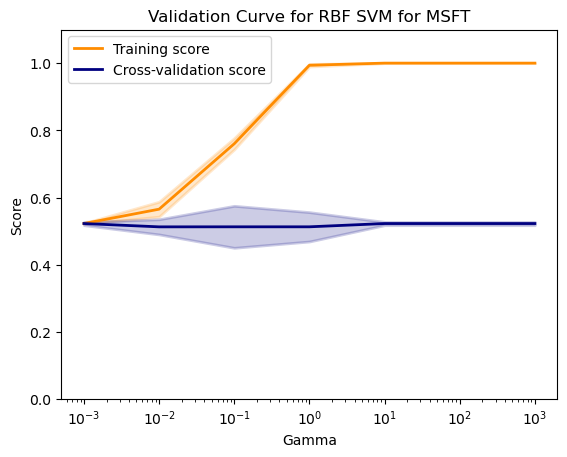

In [91]:
from sklearn.model_selection import train_test_split

stock_finance_df = pd.read_csv(f'../MSFT Data/MSFT_finance_data.csv')
stock_sentiment_df = pd.read_csv(f'../MSFT Data/MSFT_avg_sentiment_data.csv')
merged_stock_df = pd.merge(stock_finance_df, stock_sentiment_df, on='Date', how='inner')
merged_stock_df = apply_lag_features(merged_stock_df)
merged_stock_df = drop_na(merged_stock_df)

features = [
        'Open', 'Close', 'Volume', 'sentiment_compound', 'prev1_open', 'prev1_close','prev1_volume',
        'prev2_volume', 'prev2_open', 'prev2_close', 'prev1_sentiment_compound',
        'prev2_sentiment_compound'
]

X = merged_stock_df[features]
y = merged_stock_df['target'].astype(float)  # goal is to predict the next day's closing price (classification)

valid_idx = np.isin(y, [-1, 1]) # removing any row that does not have -1 or 1 as target
X = X[valid_idx]
y = y[valid_idx]

# scale features in order to avoid certain features from dominating others
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define the SVM gamma parameter range
param_range = np.logspace(-3, 3, 7)

# Calculate the validation curve for the SVM gamma parameter
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf'), X_train, y_train, param_name="gamma", param_range=param_range, cv=5)

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.title("Validation Curve for RBF SVM for MSFT")
plt.xlabel("Gamma")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use gamma=0.1 (10^-1) and default C=1.0
final_svm = SVC(kernel='rbf', gamma=0.1, C=1.0)

# Train on the scaled training data
final_svm.fit(X_train, y_train)

SVC(gamma=0.1)

In [46]:
y_pred = final_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy:", acc)

Test set accuracy: 0.74


In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print(report)

Confusion Matrix:
 [[15 10]
 [ 6 19]]
              precision    recall  f1-score   support

        -1.0       0.71      0.60      0.65        25
         1.0       0.66      0.76      0.70        25

    accuracy                           0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50

